# Gabi tester datavisualisering 

In [26]:
import pandas as pd
pd.set_option("display.max_columns", None)
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl

In [85]:
def setup_mpl():
    mpl.rcParams["font.family"] = "Helvetica Neue"
    mpl.rcParams["font.size"] = 11
    mpl.rcParams["figure.figsize"] = (7,2.5)
    mpl.rcParams["figure.dpi"] = 200
    # mpl.rcParams["lines.linewidth"] = 1
setup_mpl()

In [72]:
#Start here and load the dataframe
df = pd.read_csv("dropped_col_df.csv")
df = df[df.STRATUM != "0"] #0 corresponds to nan, i.e. removing nans

In [ ]:
df.info()

In [56]:
df.head()

,Unnamed: 0,COD_S11,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,REVENUE,JOB,SCHOOL_NAME,SCHOOL_NAT,SCHOOL_TYPE,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11,Cod_SPro,UNIVERSITY,ACADEMIC_PROGRAM,QR_PRO,CR_PRO,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,SEL,SEL_IHE
0,0,SB11201210000129,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,Stratum 4,It is not classified by the SISBEN,Three,Between 1 and less than 2 LMMW,No,COL NUEVO CAMBRIDGE,PRIVATE,ACADEMIC,71,81,61,86,82,EK201830142293,UNIVERSIDAD DE SANTANDER - UDES-BUCARAMANGA,INDUSTRIAL ENGINEERING,71,93,71,93,79,181,180,91,5,4,2,2
1,1,SB11201210000137,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,Stratum 5,It is not classified by the SISBEN,Three,10 or more LMMW,No,COL LA QUINTA DEL PUENTE,PRIVATE,ACADEMIC,83,75,66,100,88,EK201830002633,UNIVERSIDAD DE LOS ANDES-BOGOTÁ D.C.,INDUSTRIAL ENGINEERING,97,38,86,98,78,201,182,92,5,4,4,4
2,2,SB11201210005154,M,Not sure,Not sure,Independent,Home,Stratum 2,Level 2,Five,Between 1 and less than 2 LMMW,"Yes, 20 hours or more per week",CENT EDUC PAULO FREIRE ...,PRIVATE,ACADEMIC,52,49,38,46,42,EK201830196510,UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA UNA...,ELECTRONIC ENGINEERING,17,1,18,43,22,113,113,7,1,1,1,1
3,3,SB11201210007504,F,Not sure,Not sure,Other occupation,Independent,Stratum 2,It is not classified by the SISBEN,Three,Between 2 and less than 3 LMMW,No,LICEO ANDINO,PRIVATE,ACADEMIC,56,55,51,64,73,EK201830031665,UNIVERSIDAD CATOLICA DE PEREIRA-PEREIRA,INDUSTRIAL ENGINEERING,65,35,76,80,48,137,157,67,4,3,2,2
4,4,SB11201210007548,M,Complete professional education,Complete professional education,Executive,Home,Stratum 4,It is not classified by the SISBEN,One,Between 7 and less than 10 LMMW,No,LIC TALLER SAN MIGUEL,PRIVATE,ACADEMIC,80,65,76,85,92,EK201830130461,UNIVERSIDAD INDUSTRIAL DE SANTANDER-BUCARAMANGA,INDUSTRIAL ENGINEERING,94,94,98,100,71,189,198,98,5,4,4,2


In [73]:
df.SEL_IHE.value_counts()

2    7735
4    2692
1    1136
3     834
Name: SEL_IHE, dtype: int64

## Normalization of data

#### Average score generation

In [130]:
df["HI_GRADE_AVG"] = df[["CR_S11", "CC_S11", "ENG_S11"]].mean(axis=1)
df["COL_GRADE_AVG"] = df[["CR_PRO", "CC_PRO", "ENG_PRO"]].mean(axis=1)

#### Gender distribution

In [98]:
df[["GENDER", "HI_GRADE_AVG"]].groupby(["GENDER"]).mean()

,HI_GRADE_AVG
GENDER,
F,60.775462
M,61.329393


In [99]:
df[["GENDER", "HI_GRADE_AVG"]].groupby(["GENDER"]).mean()
df[["GENDER", "Unnamed: 0"]].groupby(["GENDER"]).count()

,Unnamed: 0
GENDER,
F,5037
M,7360


#### Socieconomic levels ("Stratum") distribution

In [100]:
df[["SEL", "STRATUM", "Unnamed: 0"]].groupby(["SEL","STRATUM"]).count()

Unnamed: 0
SEL STRATUM              
1   Stratum 1         837
    Stratum 2         923
    Stratum 3         326
    Stratum 4          40
    Stratum 5           3
    Stratum 6           6
2   Stratum 1         685
    Stratum 2        2038
    Stratum 3        1580
    Stratum 4         339
    Stratum 5          70
    Stratum 6          24
3   Stratum 1         104
    Stratum 2         458
    Stratum 3         676
    Stratum 4         171
    Stratum 5          66
    Stratum 6          13
4   Stratum 1          83
    Stratum 2         610
    Stratum 3        1463
    Stratum 4        1028
    Stratum 5         494
    Stratum 6         360

In [101]:
# Vi holder os til de klasser der er

strat_df = df[["STRATUM", "Unnamed: 0"]].groupby(["STRATUM"]).count()
strat_df["n_strat_ratio"] = strat_df["Unnamed: 0"].apply(lambda x: (x/(len(df))*100))
strat_df

,Unnamed: 0,n_strat_ratio
STRATUM,,
Stratum 1,1709,13.785593
Stratum 2,4029,32.499798
Stratum 3,4045,32.628862
Stratum 4,1578,12.728886
Stratum 5,633,5.106074
Stratum 6,403,3.250786


In [102]:
df[["STRATUM", "HI_GRADE_AVG"]].groupby(["STRATUM"]).mean()

,HI_GRADE_AVG
STRATUM,
Stratum 1,55.926078
Stratum 2,58.515678
Stratum 3,61.719819
Stratum 4,65.820659
Stratum 5,69.133228
Stratum 6,71.687345


#### Average both Gender and Socioeconomic level

In [103]:
df[["STRATUM","GENDER", "HI_GRADE_AVG"]].groupby(["STRATUM", "GENDER"]).mean()

HI_GRADE_AVG
STRATUM   GENDER              
Stratum 1 F          56.015603
          M          55.863214
Stratum 2 F          58.642539
          M          58.428232
Stratum 3 F          61.313714
          M          62.008887
Stratum 4 F          65.271875
          M          66.195096
Stratum 5 F          68.412766
          M          69.558626
Stratum 6 F          70.580153
          M          72.220588

#### Number of individuals by gender&socioeconomic level

In [104]:
df_gen_soc = df[["STRATUM","GENDER", "Unnamed: 0"]].groupby(["STRATUM", "GENDER"]).count()
df_gen_soc

Unnamed: 0
STRATUM   GENDER            
Stratum 1 F              705
          M             1004
Stratum 2 F             1644
          M             2385
Stratum 3 F             1682
          M             2363
Stratum 4 F              640
          M              938
Stratum 5 F              235
          M              398
Stratum 6 F              131
          M              272

In [105]:
#plot: stacked bar chart

In [106]:
df_gen_soc2 = df.groupby(["STRATUM", "GENDER"]).size().reset_index().pivot(columns='GENDER', index='STRATUM', values=0)
df_gen_soc2


GENDER,F,M
STRATUM,,
Stratum 1,705,1004
Stratum 2,1644,2385
Stratum 3,1682,2363
Stratum 4,640,938
Stratum 5,235,398
Stratum 6,131,272


Text(0.5, 0, 'Stratum')

<Figure size 360x240 with 0 Axes>

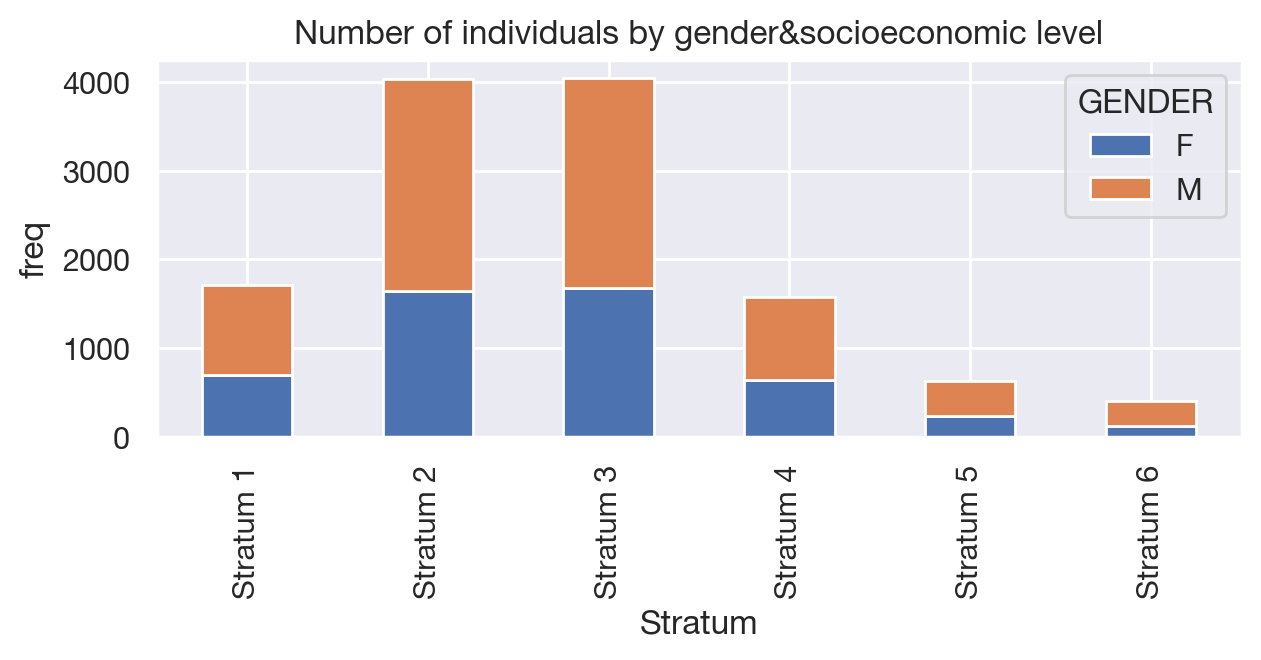

In [107]:
figure(figsize=(6, 4), dpi=60)
df_gen_soc2.plot(kind='bar', stacked=True)
plt.title("Number of individuals by gender&socioeconomic level")
plt.ylabel("freq")
plt.xlabel("Stratum")

### Distribution of grades by gender&socio-economic level (before and after college)

In [110]:
df.COL_GRADE_AVG

0        85.666667
1        74.000000
2        20.666667
3        63.666667
4        97.333333
           ...    
12406    81.333333
12407    31.333333
12408    86.333333
12409    46.333333
12410    88.333333
Name: COL_GRADE_AVG, Length: 12397, dtype: float64

In [115]:
df_gen_soc_hc = df[['HI_GRADE_AVG', 'COL_GRADE_AVG', 'GENDER', 'STRATUM']]
df_gen_soc_hc.head()

,HI_GRADE_AVG,COL_GRADE_AVG,GENDER,STRATUM
0,74.666667,85.666667,F,Stratum 4
1,76.333333,74.000000,F,Stratum 5
2,43.000000,20.666667,M,Stratum 2
3,59.666667,63.666667,F,Stratum 2
4,77.666667,97.333333,M,Stratum 4


In [135]:
df_use = df_gen_soc_hc.groupby(["STRATUM", "GENDER"]).mean()
df_use["DIFF"] = df_use["COL_GRADE_AVG"]-df_use["HI_GRADE_AVG"]
df_use.sort_index(ascending=False)

HI_GRADE_AVG  COL_GRADE_AVG      DIFF
STRATUM   GENDER                                       
Stratum 6 M          72.220588      79.688725  7.468137
          F          70.580153      77.870229  7.290076
Stratum 5 M          69.558626      77.118090  7.559464
          F          68.412766      74.090780  5.678014
Stratum 4 M          66.195096      72.585288  6.390192
          F          65.271875      71.417187  6.145313
Stratum 3 M          62.008887      65.600790  3.591903
          F          61.313714      63.858700  2.544986
Stratum 2 M          58.428232      58.774983  0.346751
          F          58.642539      58.285888 -0.356650
Stratum 1 M          55.863214      51.744024 -4.119190
          F          56.015603      51.877069 -4.138534

In [172]:
df_gen_soc_hc = df_gen_soc_hc.rename(columns = {"HI_GRADE_AVG":"HI", "COL_GRADE_AVG":"COL"})

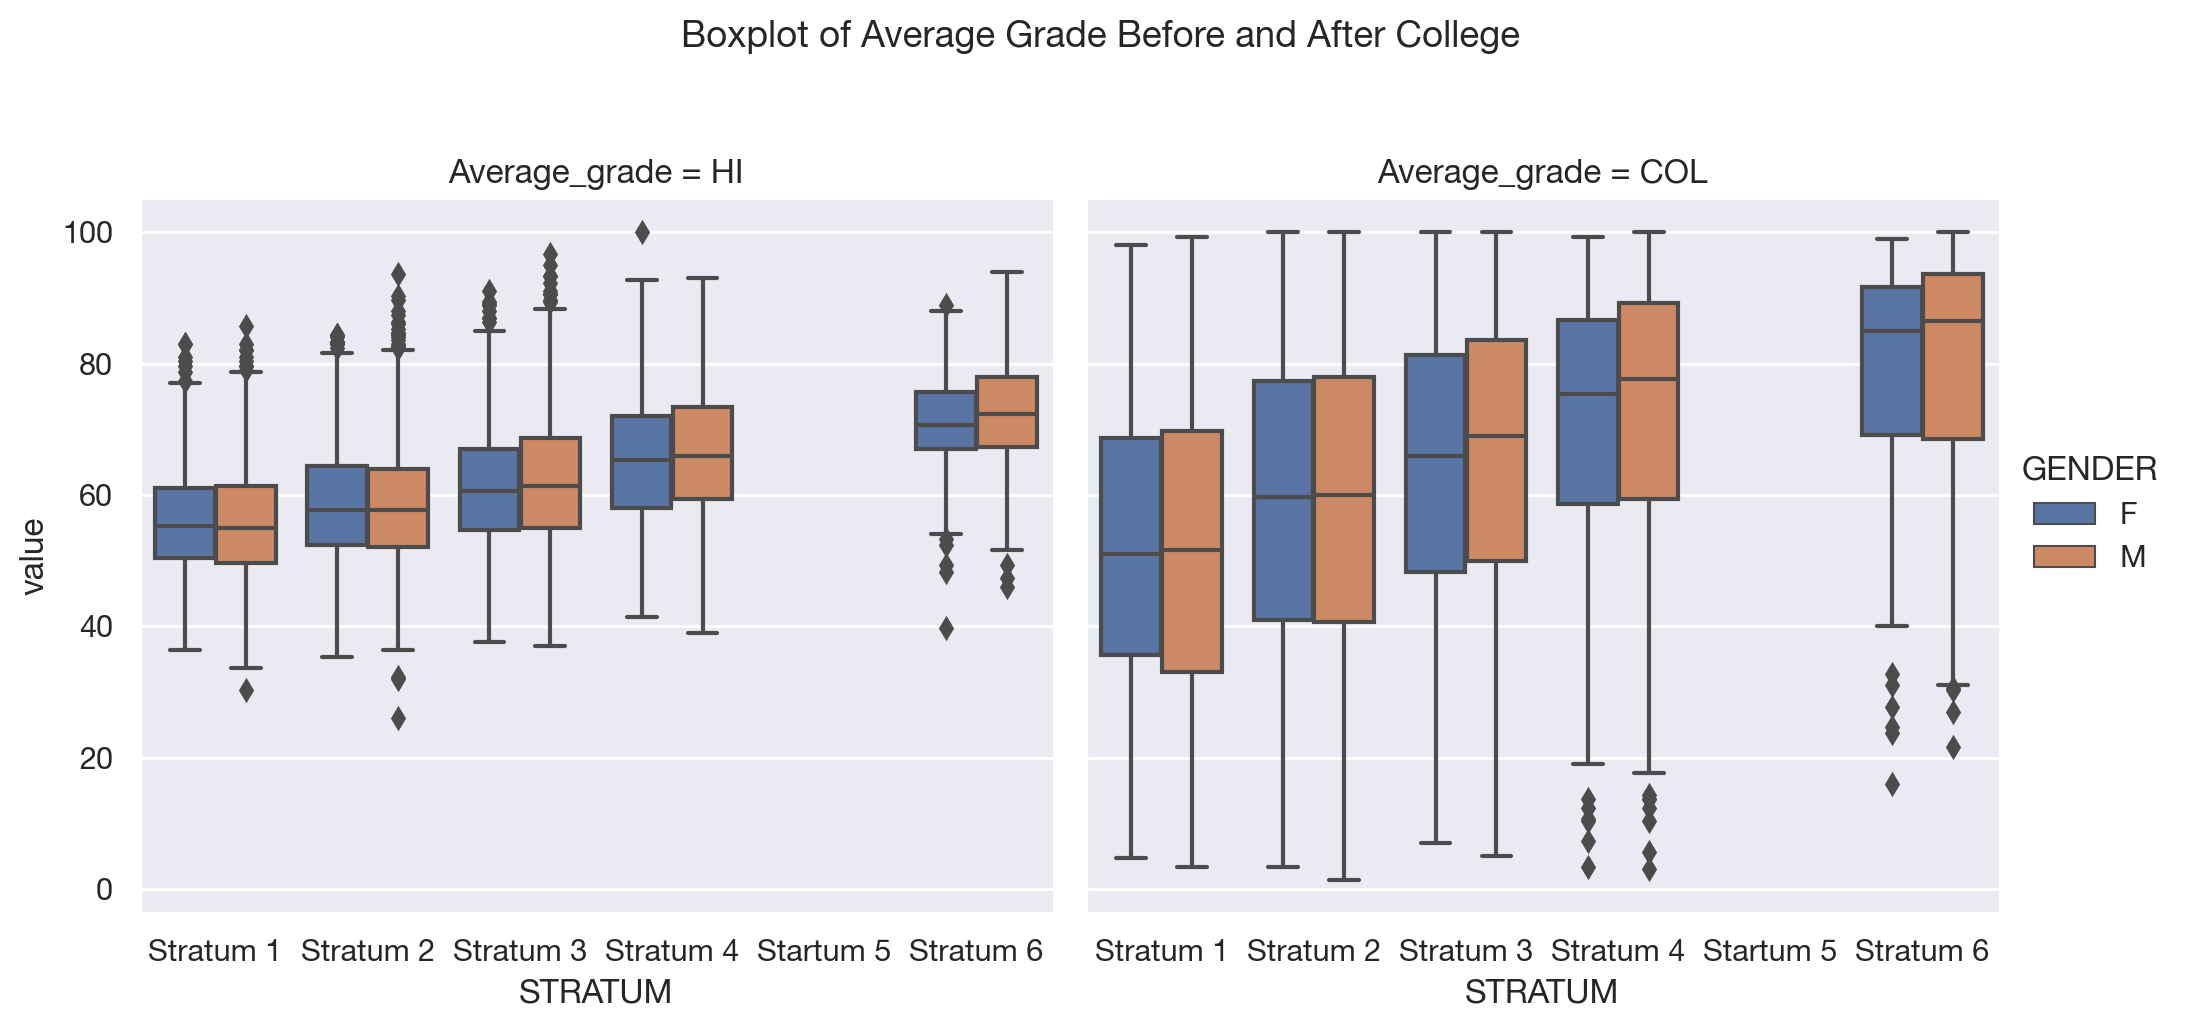

In [190]:
# plot af badass boxplot

df_try = pd.melt(df_gen_soc_hc, id_vars=['GENDER', 'STRATUM'])
df_try = df_try.rename(columns={"variable":"Average_grade"})

b = sns.catplot(data=df_try, x='STRATUM', y='value', 
               hue='GENDER', col='Average_grade',
               kind='box', legend=True, order=["Stratum 1", "Stratum 2", "Stratum 3", "Stratum 4", "Startum 5", "Stratum 6"])
b.fig.subplots_adjust(top=.8)
b.fig.suptitle('Boxplot of Average Grade Before and After College')


plt.show()

### Matrix showing the Pearson correlation between grades (before), grades (after), gender, socio-economic level

In [396]:
df_F = df_try[df_try.GENDER =="F"]
df_M = df_try[df_try.GENDER =="M"]
df_F_HI = df_F[df_F.Average_grade =="HI"]
df_F_COL = df_F[df_F.Average_grade =="COL"]
df_M_HI = df_M[df_M.Average_grade =="HI"]
df_M_COL = df_M[df_M.Average_grade =="COL"]


In [388]:
def xdef(x,s):
    if x[0] == s:
        return x[1]
    else:
        return 0
    
# test = df_F_HI[["STRATUM", "value"]][:10].apply(lambda x: xdef, axis=1)

In [ ]:
strats = ["Stratum 1", "Stratum 2", "Stratum 3", "Stratum 4", "Stratum 5", "Stratum 6"]
for s in strats:
    df_F_HI["df_F_HI_{}".format(s)] = df_F_HI[["STRATUM", "value"]].apply(lambda x: xdef(x,s), axis=1)
    df_F_COL["df_F_COL_{}".format(s)] = df_F_COL[["STRATUM", "value"]].apply(lambda x: xdef(x,s), axis=1)
    df_M_HI["df_M_HI_{}".format(s)] = df_M_HI[["STRATUM", "value"]].apply(lambda x: xdef(x,s), axis=1)
    df_M_COL["df_M_COL_{}".format(s)] = df_M_COL[["STRATUM", "value"]].apply(lambda x: xdef(x,s), axis=1)

    

In [397]:
strats = ["Stratum 1", "Stratum 2", "Stratum 3", "Stratum 4", "Stratum 5", "Stratum 6"]
for s in strats:
    df_F_HI["df_F_HI_{}".format(s)] = df_F_HI[df_F_HI.STRATUM == s].value
    df_F_COL["df_F_COL_{}".format(s)] = df_F_COL[df_F_COL.STRATUM == s].value
    df_M_HI["df_M_HI_{}".format(s)] = df_M_HI[df_M_HI.STRATUM == s].value
    df_M_COL["df_M_COL_{}".format(s)] = df_M_COL[df_M_COL.STRATUM == s].value


/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_27685/3221656718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_F_HI["df_F_HI_{}".format(s)] = df_F_HI[df_F_HI.STRATUM == s].value
/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_27685/3221656718.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_F_COL["df_F_COL_{}".format(s)] = df_F_COL[df_F_COL.STRATUM == s].value
/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_27685/3221656718.py:5: SettingWithCopyWarning: 
A val

In [398]:
df_F_HI

,GENDER,STRATUM,Average_grade,value,df_F_HI_Stratum 1,df_F_HI_Stratum 2,df_F_HI_Stratum 3,df_F_HI_Stratum 4,df_F_HI_Stratum 5,df_F_HI_Stratum 6
0,F,Stratum 4,HI,74.666667,NaN,NaN,NaN,74.666667,NaN,NaN
1,F,Stratum 5,HI,76.333333,NaN,NaN,NaN,NaN,76.333333,NaN
3,F,Stratum 2,HI,59.666667,NaN,59.666667,NaN,NaN,NaN,NaN
5,F,Stratum 6,HI,66.333333,NaN,NaN,NaN,NaN,NaN,66.333333
7,F,Stratum 6,HI,74.666667,NaN,NaN,NaN,NaN,NaN,74.666667
...,...,...,...,...,...,...,...,...,...,...
12387,F,Stratum 3,HI,71.000000,NaN,NaN,71.000000,NaN,NaN,NaN
12388,F,Stratum 2,HI,62.333333,NaN,62.333333,NaN,NaN,NaN,NaN
12389,F,Stratum 3,HI,63.000000,NaN,NaN,63.000000,NaN,NaN,NaN
12390,F,Stratum 3,HI,79.666667,NaN,NaN,79.666667,NaN,NaN,NaN


In [372]:
strats = ["Stratum 1", "Stratum 2", "Stratum 3", "Stratum 4", "Stratum 5", "Stratum 6"]
for s in strats:
    df_F_HI["df_F_HI_{}".format(s)] = df_F_HI[["STRATUM", "value"]].apply(lambda x: xdef(x,s), axis=1)
    df_F_COL["df_F_COL_{}".format(s)] = df_F_COL[["STRATUM", "value"]].apply(lambda x: xdef(x,s), axis=1)
    df_M_HI["df_M_HI_{}".format(s)] = df_M_HI[["STRATUM", "value"]].apply(lambda x: xdef(x,s), axis=1)
    df_M_COL["df_M_COL_{}".format(s)] = df_M_COL[["STRATUM", "value"]].apply(lambda x: xdef(x,s), axis=1)

    
    
    

/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_27685/1369242704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_F_HI["df_F_HI_{}".format(s)] = df_F_HI[["STRATUM", "value"]].apply(lambda x: xdef(x,s), axis=1)
/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_27685/1369242704.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_F_COL["df_F_COL_{}".format(s)] = df_F_COL[["STRATUM", "value"]].apply(lambda x: xdef(x,s), axis=1)
/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipyker

In [402]:
df_F_COL

,GENDER,STRATUM,Average_grade,value,df_F_COL_Stratum 1,df_F_COL_Stratum 2,df_F_COL_Stratum 3,df_F_COL_Stratum 4,df_F_COL_Stratum 5,df_F_COL_Stratum 6
12397,F,Stratum 4,COL,85.666667,NaN,NaN,NaN,85.666667,NaN,NaN
12398,F,Stratum 5,COL,74.000000,NaN,NaN,NaN,NaN,74.0,NaN
12400,F,Stratum 2,COL,63.666667,NaN,63.666667,NaN,NaN,NaN,NaN
12402,F,Stratum 6,COL,48.000000,NaN,NaN,NaN,NaN,NaN,48.000000
12404,F,Stratum 6,COL,92.333333,NaN,NaN,NaN,NaN,NaN,92.333333
...,...,...,...,...,...,...,...,...,...,...
24784,F,Stratum 3,COL,41.000000,NaN,NaN,41.000000,NaN,NaN,NaN
24785,F,Stratum 2,COL,89.666667,NaN,89.666667,NaN,NaN,NaN,NaN
24786,F,Stratum 3,COL,87.333333,NaN,NaN,87.333333,NaN,NaN,NaN
24787,F,Stratum 3,COL,79.000000,NaN,NaN,79.000000,NaN,NaN,NaN


In [399]:
#Merging
result_df = pd.concat([df_F_HI.iloc[:,4:], df_F_COL.iloc[:,4:], df_M_HI.iloc[:,4:], df_M_COL.iloc[:,4:]], axis=1)

In [400]:
result_df

,df_F_HI_Stratum 1,df_F_HI_Stratum 2,df_F_HI_Stratum 3,df_F_HI_Stratum 4,df_F_HI_Stratum 5,df_F_HI_Stratum 6,df_F_COL_Stratum 1,df_F_COL_Stratum 2,df_F_COL_Stratum 3,df_F_COL_Stratum 4,df_F_COL_Stratum 5,df_F_COL_Stratum 6,df_M_HI_Stratum 1,df_M_HI_Stratum 2,df_M_HI_Stratum 3,df_M_HI_Stratum 4,df_M_HI_Stratum 5,df_M_HI_Stratum 6,df_M_COL_Stratum 1,df_M_COL_Stratum 2,df_M_COL_Stratum 3,df_M_COL_Stratum 4,df_M_COL_Stratum 5,df_M_COL_Stratum 6
0,NaN,NaN,NaN,74.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,76.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,59.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.333333,NaN,NaN,NaN,NaN
24790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.333333,NaN,NaN,NaN,NaN
24791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.333333,NaN,NaN,NaN,NaN
24792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


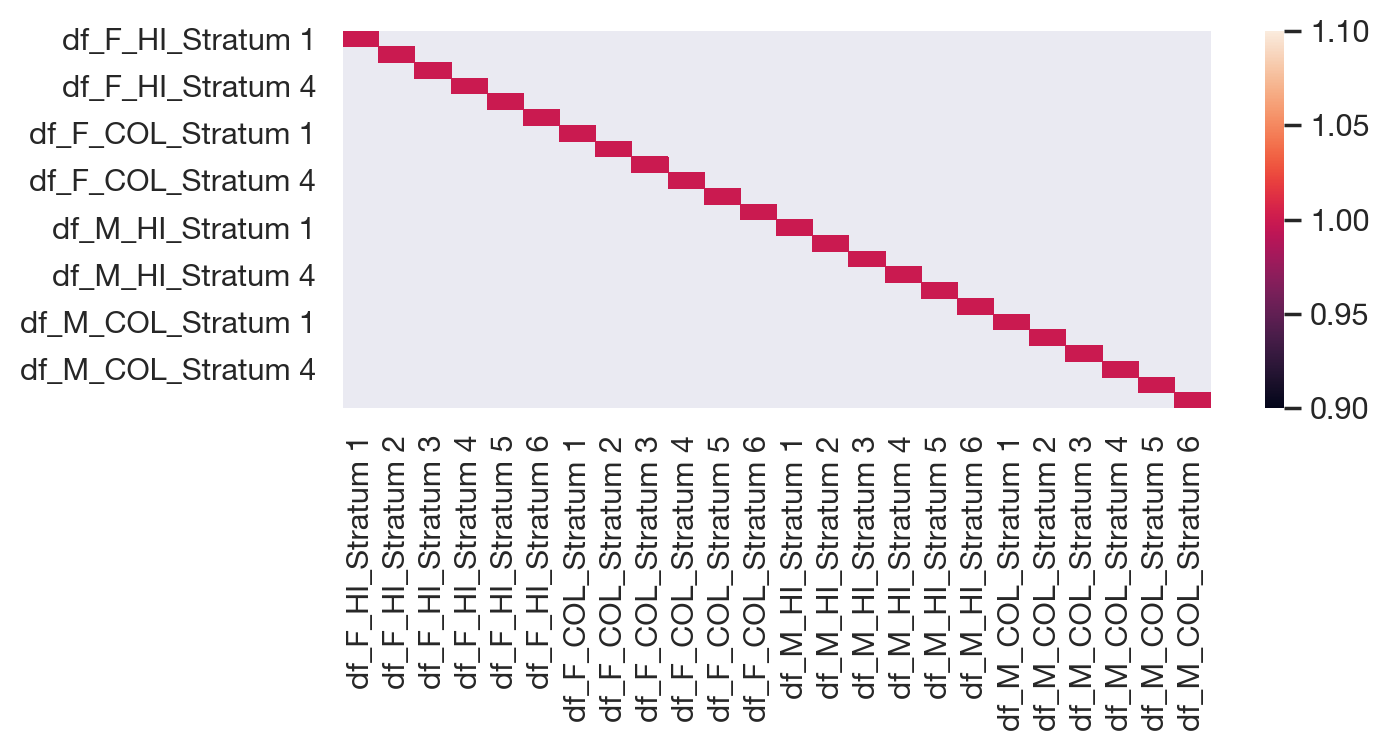

In [401]:
sns.heatmap(result_df.corr());

### Split up pearson correlation:
between grades (before), grades (after), gender, socio-economic level

In [404]:
df_use = df_gen_soc_hc.copy()
df_use

,HI,COL,GENDER,STRATUM
0,74.666667,85.666667,F,Stratum 4
1,76.333333,74.000000,F,Stratum 5
2,43.000000,20.666667,M,Stratum 2
3,59.666667,63.666667,F,Stratum 2
4,77.666667,97.333333,M,Stratum 4
...,...,...,...,...
12406,73.333333,81.333333,M,Stratum 2
12407,57.000000,31.333333,M,Stratum 2
12408,67.333333,86.333333,M,Stratum 2
12409,61.666667,46.333333,F,Stratum 3


USE: https://stackoverflow.com/questions/60731457/how-to-easily-group-values-to-improve-heatmap-visualization


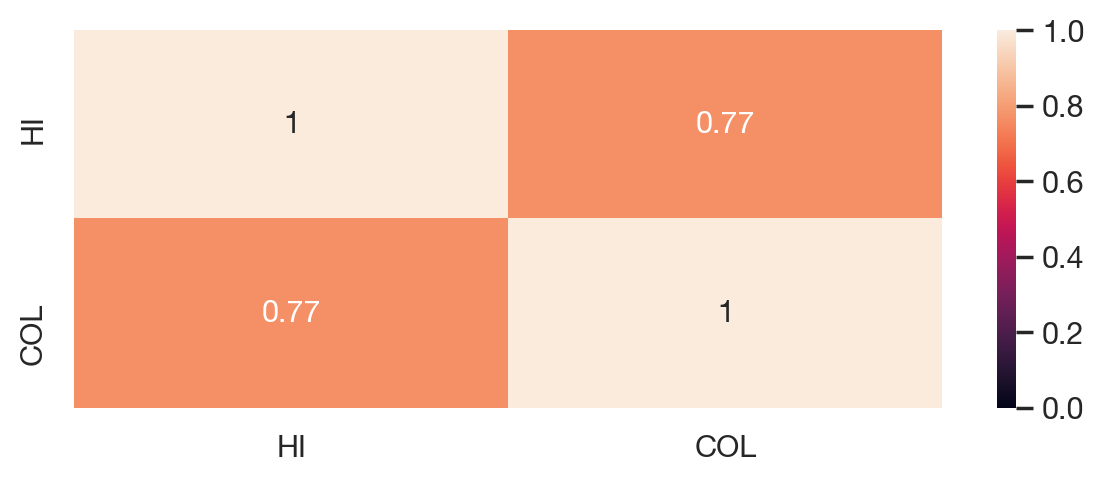

In [413]:
sns.heatmap(df_use[df_use.GENDER == "F"].corr(method="pearson"), vmin=0.0, vmax=1.0, annot = True);

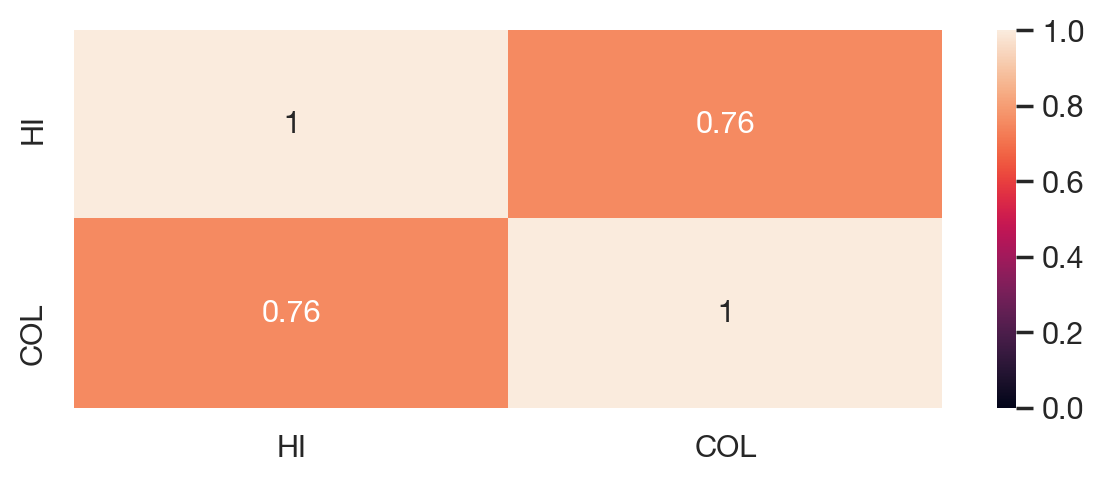

In [412]:
sns.heatmap(df_use[df_use.GENDER == "M"].corr(method="pearson"), vmin=0.0, vmax=1.0, annot = True);

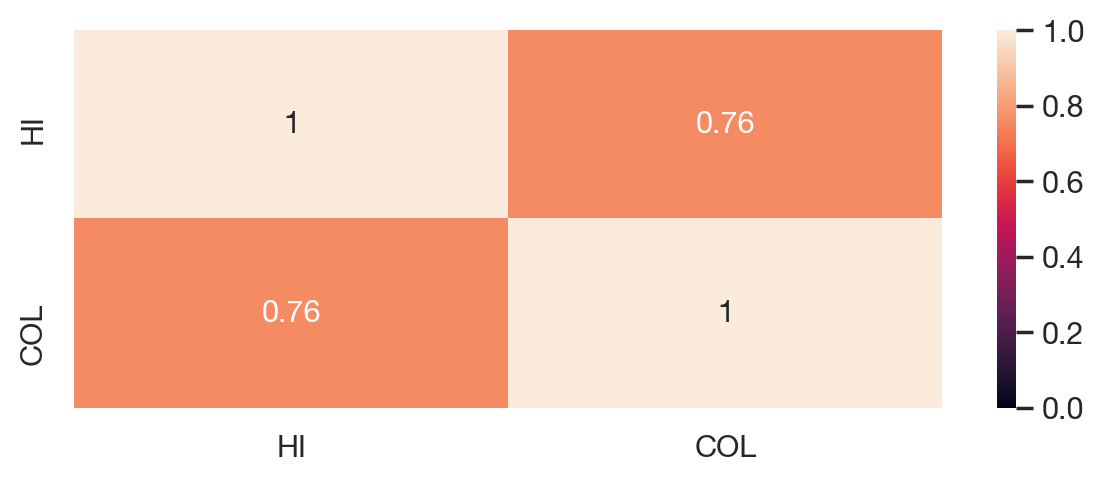

In [411]:
sns.heatmap(df_use[["HI", "COL"]].corr(method="pearson"), vmin=0.0, vmax=1.0, annot = True);

#### For each university's SEL_IHE,
plot distribution

In [13]:
df_group = df[["SEL_IHE", "CR_PRO", "CC_PRO", "ENG_PRO"]].groupby(["SEL_IHE"]).mean()

In [15]:
df_group.head()

,CR_PRO,CC_PRO,ENG_PRO
SEL_IHE,,,
1,54.934037,51.914688,51.183817
2,58.970960,56.037816,62.806789
3,64.613909,59.629496,72.786571
4,73.811664,71.184250,86.253715


#### Overall correlation, to see which data to look for

In [6]:
df['Cod_SPro'].nunique()

12395

In [38]:
df['SEL_IHE'].value_counts()

2    7748
4    2692
1    1137
3     834
Name: SEL_IHE, dtype: int64

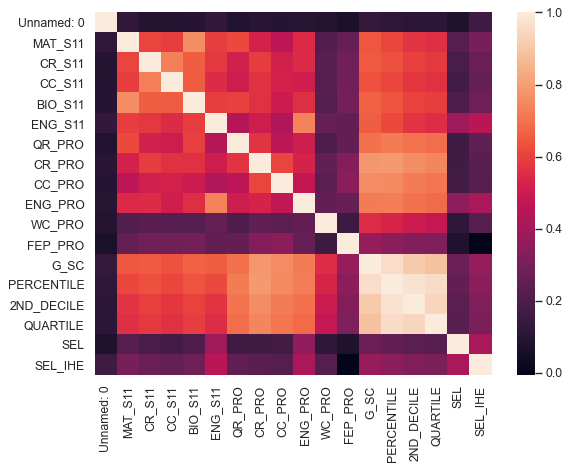

In [11]:
figure(figsize=(8, 6), dpi=80)
sns.heatmap(df.corr());

#### Testing correlation between socioeconomic level (sns) and socioeconomic level of the Institution of higher education

In [8]:
#correlation
df['SEL'].corr(df['SEL_IHE'])

0.4215563172046026

<AxesSubplot:>

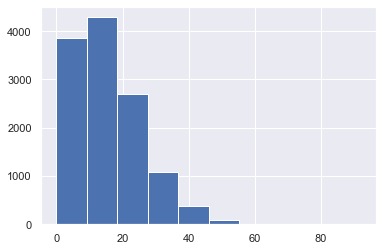

In [8]:
#plot to see which direction the people with sel goes. 
df['diff_ENG'] = abs(df['ENG_S11']-df['ENG_PRO'])
df['diff_ENG'].hist()

<AxesSubplot:>

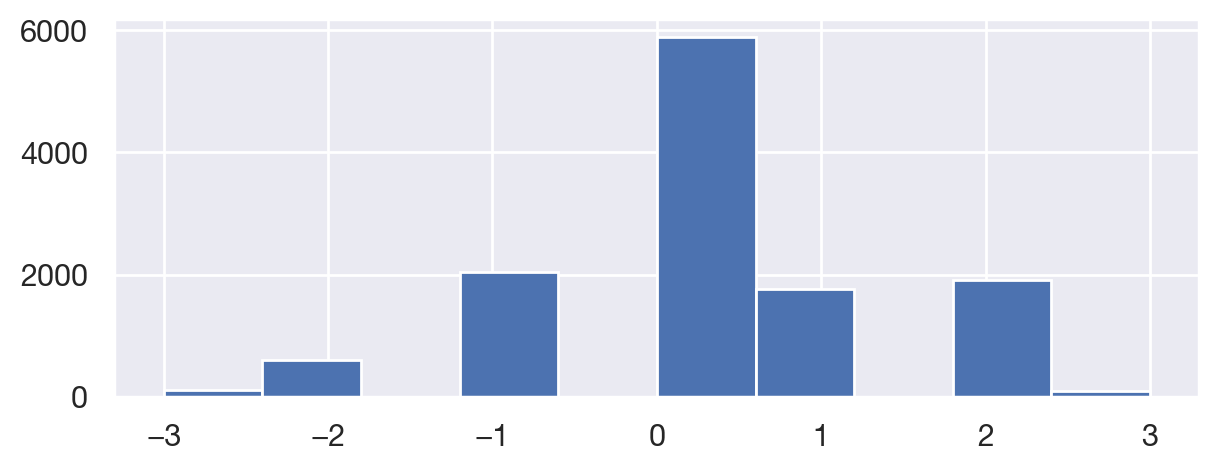

In [48]:
#plot to see which direction the people with sel goes. 
df['diff_SEL_SEL_IHE'] = df['SEL']-df['SEL_IHE']
df['diff_SEL_SEL_IHE'].hist()

#prøv at lave til stack

In [49]:
df_plot = df.groupby(['diff_SEL_SEL_IHE', 'SEL']).size().reset_index().pivot(columns='SEL', index='diff_SEL_SEL_IHE', values=0)
df_plot

SEL,1,2,3,4
diff_SEL_SEL_IHE,,,,
-3,101.0,NaN,NaN,NaN
-2,79.0,519.0,NaN,NaN
-1,1444.0,311.0,287.0,NaN
0,514.0,3465.0,126.0,1785.0
1,NaN,447.0,1002.0,318.0
2,NaN,NaN,76.0,1837.0
3,NaN,NaN,NaN,100.0


<AxesSubplot:xlabel='diff_SEL_SEL_IHE'>

<Figure size 640x480 with 0 Axes>

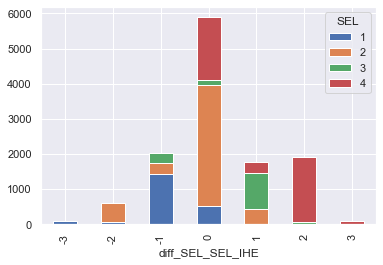

In [114]:
figure(figsize=(8, 6), dpi=80)
df_plot.plot(kind='bar', stacked=True)

In [115]:
df.SEL.value_counts()

2    4742
4    4040
1    2138
3    1491
Name: SEL, dtype: int64

In [29]:
#create column with n occurences of combination, to plot a bubble chart
count_series = df.groupby(['SEL', 'SEL_IHE']).size()
df2 = count_series.to_frame(name = 'size').reset_index()
df2[:5]

,SEL,SEL_IHE,size
0,1,1,514
1,1,2,1444
2,1,3,79
3,1,4,101
4,2,1,447


<AxesSubplot:xlabel='SEL', ylabel='SEL_IHE'>

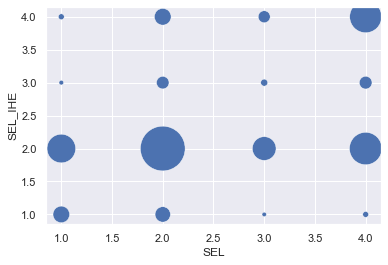

In [26]:
# Plotting bubble chart to see number of occurences for each combination
sns.scatterplot(data=df2, x="SEL", y="SEL_IHE", size="size",legend=False, sizes=(20, 2000))

### Stratum, sisben and socioeconomic level

In [87]:
# new columns for stratum and sisben with int values
df["STRATUM"].replace({'Stratum 4':4, 'Stratum 5':5, 'Stratum 2':2, 'Stratum 6':6, 'Stratum 3':3,
       'Stratum 1':1, '0':0}, inplace=True)

df["SISBEN"].replace({'It is not classified by the SISBEN':None, 'Level 2':2, 'Level 1':1, 'Esta clasificada en otro Level del SISBEN':4, 'Level 3':3, '0':0}, inplace=True)


In [91]:
df["STRATUM"].value_counts()

3    4045
2    4029
1    1709
4    1578
5     633
6     403
0      14
Name: STRATUM, dtype: int64

In [90]:
df["SISBEN"].value_counts()

0    7555
2    2120
1    2057
3     583
4      96
Name: SISBEN, dtype: int64

<AxesSubplot:>

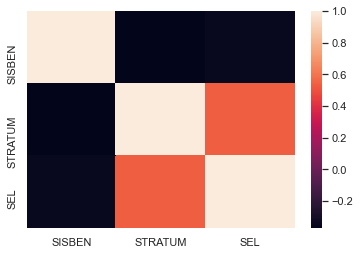

In [89]:
corr_df = df[["SISBEN","STRATUM", "SEL" ]]
sns.heatmap(corr_df.corr())

In [78]:
df["STRATUM"]

0        4
1        5
2        2
3        2
4        4
        ..
12406    2
12407    2
12408    2
12409    3
12410    3
Name: STRATUM, Length: 12411, dtype: int64